# Multilayer perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prettier plots
sns.set()

In [2]:
class NeuronLayer():
    def __init__(self, n_inputs, n_neurons):
        self.weights = 2 * np.random.random((n_inputs, n_neurons)) - 1
        self.output = np.zeros(n_neurons)
        self.bias = np.zeros(n_neurons)
        self.deltas = np.zeros(n_neurons)
    def print(self):
        print("Weights:", self.weights)
        
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.errors = []

    def activation_function(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid
    
    def activation_function_derivative(self, x):
        return x * (1 - x)  # Sigmoid derivative
    
    def train(self, inputs, expected, learning_rate, n_epochs):
        for epoch in range(n_epochs):
            self.forward_propagation(inputs)
            self.backward_propagation(expected)
            self.update_weights(inputs, learning_rate)
            
    def forward_propagation(self, inputs):
        for layer in self.layers:
            layer.outputs = self.activation_function(np.dot(inputs, layer.weights))
            inputs = layer.outputs
        return inputs
    
    def backward_propagation(self, expected):
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            errors = 0
            if i == len(self.layers) - 1:
                errors = expected - layer.outputs
                self.errors.append(errors)
            else:
                errors = np.dot(self.layers[i+1].deltas, self.layers[i+1].weights.T)

            layer.deltas = errors * self.activation_function_derivative(layer.outputs)
    
    def update_weights(self, inputs, learning_rate):
        adjustments = [];
        for i in range(len(self.layers)):
            if i != 0:
                inputs = self.layers[i-1].outputs
            adjustments.append(inputs.T.dot(self.layers[i].deltas) * learning_rate)
        for i in range(len(self.layers)):
            self.layers[i].weights += adjustments[i]

In [3]:
data_set = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
xor_set  = np.array([[0], [1], [1], [0]])

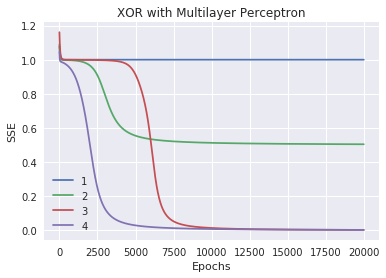

array([[0.02773024],
       [0.96915223],
       [0.97782037],
       [0.02912144]])

In [4]:
for n_hidden in range(1, 5):    
    hl = NeuronLayer(3, n_hidden)
    ol = NeuronLayer(n_hidden, 1)
    nn = NeuralNetwork((hl, ol))
    nn.train(data_set, xor_set, 0.1, 20000)
    plt.plot(np.sum(np.squeeze(nn.errors)**2,1), label=n_hidden)

plt.title("XOR with Multilayer Perceptron")
plt.ylabel("SSE")
plt.xlabel("Epochs")
plt.legend()
plt.show()
nn.forward_propagation(data_set)